## Capstone Project:
****
## Analyzing risk factors for cervical cancer diagnosis: Data exploration, inferences, and classification

## Importance of the project: 
***
+ The red color in the world map showing countries with the highest death rate in women due to cervical cancer.
+ The color (red-green-purple-black-ash) shows from the highest to the lowest death rates in women.
+ African countries have the highest death rate. Below, there is a bar graph showing top 5 countries having highest death rates in women due to cervical cancer.

<div class = "span5 alert alert-success">

![Cervical cancer death rate per 100,000 women worldwide](female.png)

<b>Countries with red (mostly in Africa and South America) and green colors show the severest and next severest death rate per 100,000 female.</b>   

* Source: https://www.worldlifeexpectancy.com/cause-of-death/cervical-cancer/by-country/female


## Introduction
This project aims to investigate/analyze risk factors leading to cervical cancer. Cervical cancer is the fourth-most common death cause in women worldwide. Particularly, in low-income countries in Africa, South America, and Asia, cervical cancer is the most common cause of cancer death in women. Smoking, heterogeneity in partnership, and use of contraceptives are the risk factors for this type of cancer. Diagnosis is done by a biopsy. 

In [1]:
# <font color="blue" style="font-family:Times New Roman"> Capstone Project: Analyzing risk factors for cervical cancer diagnosis</font> 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
countries = ['Mozambique', 'Malawi', 'Burundi', 'Comoros', 'Tanzania']
death_rate = [49.95, 48.45, 46.35, 44.46, 36.16]

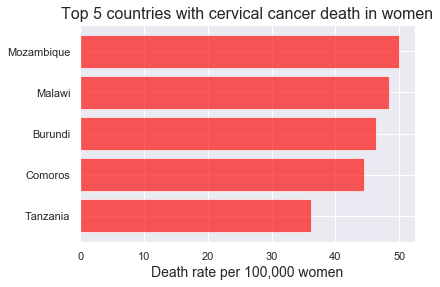

In [3]:
countries.reverse() # reversed for plotting so that top one comes first
death_rate.reverse()

# sns.set_style("whitegrid")
# sns.set_context('poster')
sns.set()
plt.barh(countries, death_rate, color="red", alpha=0.65)
plt.title('Top 5 countries with cervical cancer death in women', fontsize=16)
plt.xlabel('Death rate per 100,000 women', fontsize=14)
plt.show()

## Aim of this project
***

<div class = "span5 alert alert-info">

The focus of this project is to find answers to following research questions:
<font color="FireBrick">
+ Exploratory data analysis:
  + Which risk factors, for example, number of partners, age of the first intercourse, number of pregnancies, smoking habit, use of hormonal contraceptives, are most prominent/significant?    
  + What kind of patterns exist among risk factors causing to cervical cancer?
  + Which age group are most vulnerable to this cancer? 
  + How factors, for example, by age group along with smoker or non-smoker, number of years of smoking, and number packs per year of smoking are interrelated? 
 + How factors like number of partners (single or heterogenous), pregnancies or non-pregnancies, use of hormonal contraceptives, intrauterine devices (IUD) influence the cancer diagnosis?
+ Perform statistical significance test.
+ Conduct predictive analytics by applying machine learning classification algorithms, namely logistic regression and support vector machine (SVM). 
</font></div>

## The dataset
***

The dataset is from the 'Hospital Universitario de Caracas' in Caracas, Venezuela, collected from the Univerversity of California, Irvine, USA Machine Learning Repository  at https://archive.ics.uci.edu/ml/datasets/Cervical+cancer+%28Risk+Factors%29.  Informations of 858 patients' respective demography, habits, and historic medical records are in the dataset. Several patients decided not to answer some of the questions because of privacy concerns (missing values).

In [5]:
# from IPython.display import Image
# from IPython.core.display import HTML
# Image(url="OneDrive/Documents/SpringBoard/Capstone_Project_1/Cervical_Cancer_data_code/female.png")

In [6]:
# import matplotlib.pyplot as plt
# import matplotlib.image as mpimg
# image = mpimg.imread("female.png")
# plt.imshow(image)
# plt.show()

## **Read data from a csv file**: Replace **missing values** ('?') by NaN using na_values='?'

In [5]:
# Replace missing values ('?') by Nan
df_data = pd.read_csv('risk_factors_cervical_cancer.csv', na_values='?') 

## **Preliminary data exploration -- shape, columns, isnull**

In [6]:
df_data.shape

(858, 36)

In [7]:
pd.set_option('display.max_columns', 36)
df_data.head(3)

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,0,0,0,0,0,0,0,0


In [8]:
df_data[df_data['Biopsy']==1].shape

(55, 36)

In [9]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
Age                                   858 non-null int64
Number of sexual partners             832 non-null float64
First sexual intercourse              851 non-null float64
Num of pregnancies                    802 non-null float64
Smokes                                845 non-null float64
Smokes (years)                        845 non-null float64
Smokes (packs/year)                   845 non-null float64
Hormonal Contraceptives               750 non-null float64
Hormonal Contraceptives (years)       750 non-null float64
IUD                                   741 non-null float64
IUD (years)                           741 non-null float64
STDs                                  753 non-null float64
STDs (number)                         753 non-null float64
STDs:condylomatosis                   753 non-null float64
STDs:cervical condylomatosis          753 non-null float64
STDs:vaginal

### Observations: 
***
+ The dataset has 858 instances with 36 features.
+ Out of 858 patients, only 55 patients. i.e., 6.4% paients are diagnozied with malignant biopsy (biopsy = 1).
+ Two features "<i>STDs: Time since first diagnosis</i>" and "<i>STDs: Time since last diagnosis</i>" have only 71 non-null values. Since more than 90% observations are missing in these two features, we have dropped them from our analysis.

In [10]:
df_data_v1 = df_data.drop(['STDs: Time since first diagnosis', 'STDs: Time since last diagnosis'], axis=1)

In [11]:
df_data_v1.describe()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,858.000000,832.000000,851.000000,802.000000,845.000000,845.000000,845.000000,750.000000,750.000000,741.000000,741.000000,753.000000,753.000000,753.000000,753.0,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.0,753.000000,753.000000,753.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,2.527644,16.995300,2.275561,0.145562,1.219721,0.453144,0.641333,2.256419,0.112011,0.514804,0.104914,0.176627,0.058433,0.0,0.005312,0.057105,0.023904,0.001328,0.001328,0.001328,0.0,0.023904,0.001328,0.002656,0.087413,0.020979,0.010490,0.020979,0.027972,0.040793,0.086247,0.051282,0.064103
std,8.497948,1.667760,2.803355,1.447414,0.352876,4.089017,2.226610,0.479929,3.764254,0.315593,1.943089,0.306646,0.561993,0.234716,0.0,0.072739,0.232197,0.152853,0.036442,0.036442,0.036442,0.0,0.152853,0.036442,0.051503,0.302545,0.143398,0.101939,0.143398,0.164989,0.197925,0.280892,0.220701,0.245078
min,13.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,2.000000,17.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,3.000000,18.000000,3.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,28.000000,32.000000,11.000000,1.000000,37.000000,37.000000,1.000000,30.000000,1.000000,19.000000,1.000000,4.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**See the pattern of patients' age - boxplot and histogram**

In [12]:
print('Patients\' age: Minimum, 25th, Median, 75th, and Maximum:')
print('-------------------------------------------------------')
df_data_v1.Age.describe()

Patients' age: Minimum, 25th, Median, 75th, and Maximum:
-------------------------------------------------------


count    858.000000
mean      26.820513
std        8.497948
min       13.000000
25%       20.000000
50%       25.000000
75%       32.000000
max       84.000000
Name: Age, dtype: float64

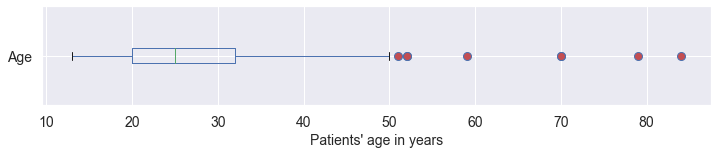

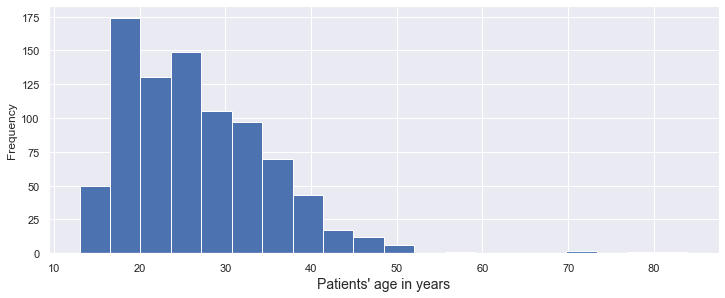

In [13]:
plt.subplot(2,1,1)
circle_red_flier = dict(marker='o', markerfacecolor='r', markersize=8,
                  linestyle='none', markeredgecolor='b')
# cap = dict(linestyle='solid', color='r')
df_data_v1.Age.plot(kind='box', figsize=(12,4), vert=False, flierprops=circle_red_flier, fontsize=14) #, capprops=cap)
plt.xlabel('Patients\' age in years', fontsize=14)
plt.show()

plt.subplot(2,1,2)
df_data_v1.Age.plot(kind='hist', bins=20, figsize=(12,10))
# sns.distplot(a=np.array(df_data_v1.Age), hist=True, norm_hist=True)
plt.xlabel('Patients\' age in years', fontsize=14)
plt.show()

### Key takeways:
***
+ **The distribution of patients' "Age" is positively skewed (left modal).**
+ **Mean = 26.82 years, Min. = 13 years, Max. = 84 years, and Standard deviation = 8.50 years.** 
+ **The boxplot also shows that there are some outliers above the age of 50 years.**

### **Divide the dataset into three parts: patients' (a) behavior, (b) smoking habits, and (c) medical diagnosis**
***
+ Age
+ Number od sexual partners
+ Age at the first intercourse
+ Number of pregnancies
+ Biopsy results: 0 (benign) or 1 (malignant)

In [14]:
df_behavior = df_data_v1[['Age', 'Number of sexual partners', 'First sexual intercourse', 'Num of pregnancies', 'Biopsy']]

In [15]:
df_behavior.head(3)

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Biopsy
0,18,4.0,15.0,1.0,0
1,15,1.0,14.0,1.0,0
2,34,1.0,NaN,1.0,0


Fill forward NaN values

In [16]:
df_behavior_v1 = df_behavior.fillna(method='ffill')
# df_behavior_v1.isnull().sum()

In [17]:
df_behavior_v1['Biopsy'] = df_behavior_v1['Biopsy'].map({0:'Benign', 1:'Malignant'})

In [18]:
df_behavior_v1.head(3)

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Biopsy
0,18,4.0,15.0,1.0,Benign
1,15,1.0,14.0,1.0,Benign
2,34,1.0,14.0,1.0,Benign


C:\Users\elias\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


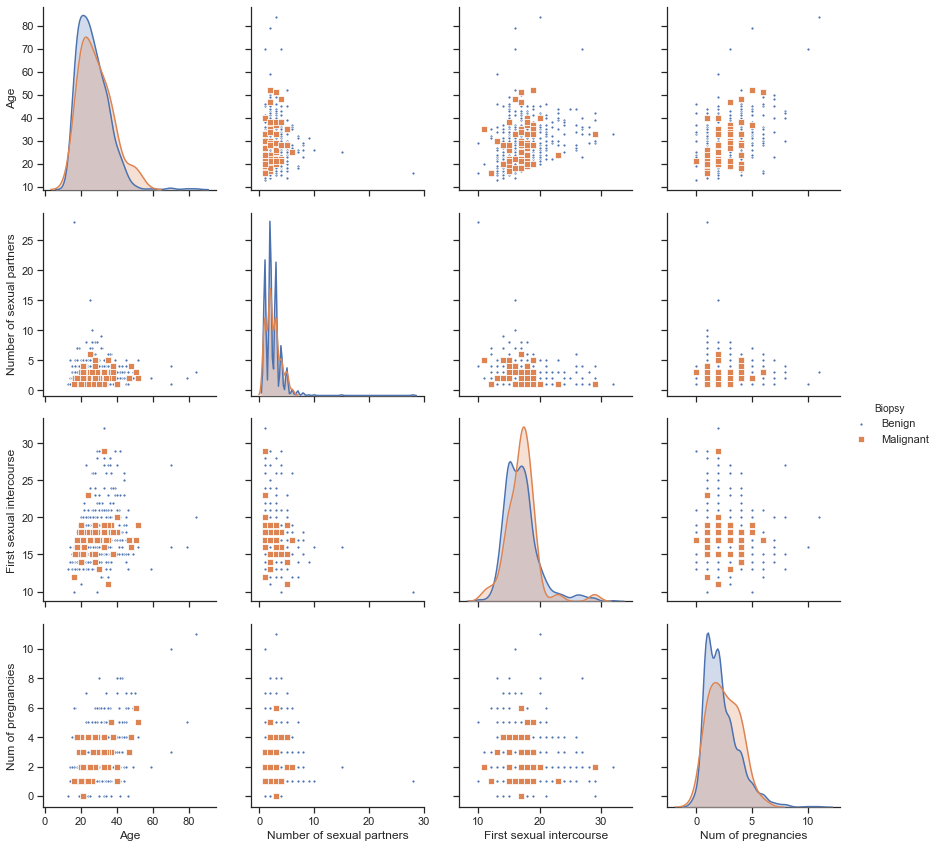

In [19]:
sns.set(style='ticks')
sns.pairplot(df_behavior_v1, hue='Biopsy', height=3, markers=[".","s"], aspect=1, kind='scatter') # hue_order=['green', 'red'])
# plt.suptitle("Pairplot showing reltionship among Age, Number of partners, Age of first intercourse, Number of pregnancies", fontsize=14)
# plt.grid(True)
plt.show()

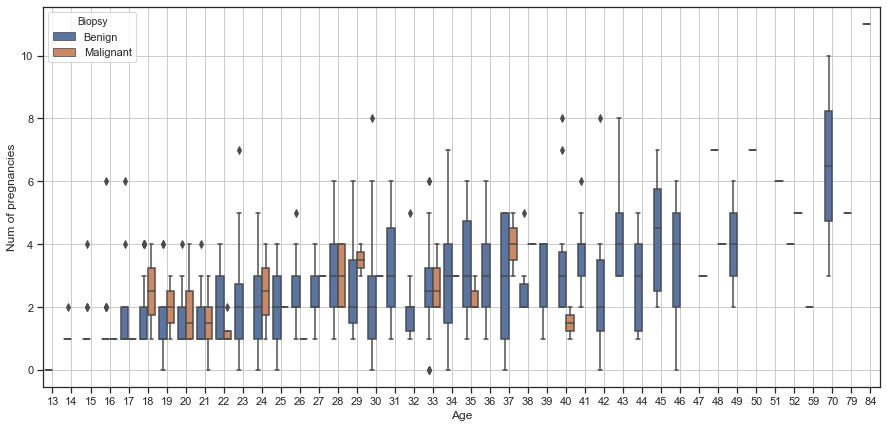

In [20]:
fig, ax_1 = plt.subplots(figsize=(15,7))
sns.boxplot(x="Age", y="Num of pregnancies", hue="Biopsy", data=df_behavior_v1, orient="v", ax=ax_1)
plt.grid(True)
plt.show()

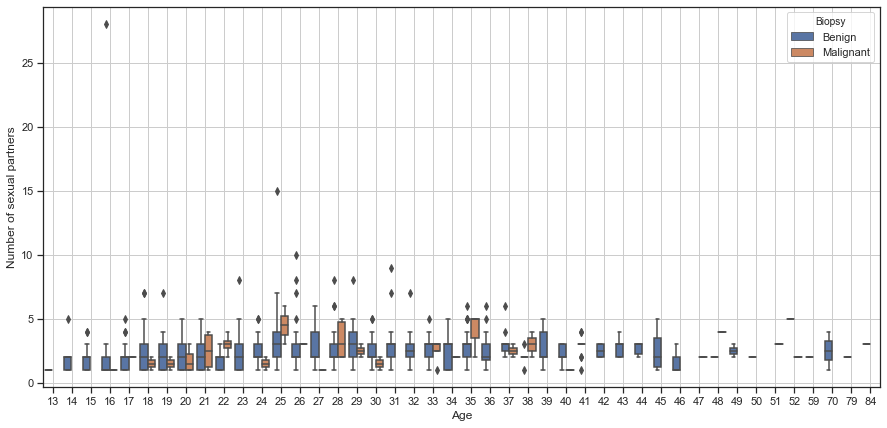

In [21]:
fig, ax_1 = plt.subplots(figsize=(15,7))
sns.boxplot(x="Age", y="Number of sexual partners", hue="Biopsy", data=df_behavior_v1, orient="v", ax=ax_1)
plt.grid(True)
plt.show()

### **Smoking habits**

In [22]:
df_smoking = df_data_v1[['Age', 'Smokes (years)', 'Smokes (packs/year)', 'Biopsy']].fillna(method='ffill')
df_smoking.isnull().sum()

Age                    0
Smokes (years)         0
Smokes (packs/year)    0
Biopsy                 0
dtype: int64

In [23]:
# df_smoking.head(3)
df_smoking_lg = df_smoking.copy()

In [24]:
df_smoking_lg.shape, df_smoking_lg.head(3)

((858, 4),    Age  Smokes (years)  Smokes (packs/year)  Biopsy
 0   18             0.0                  0.0       0
 1   15             0.0                  0.0       0
 2   34             0.0                  0.0       0)

In [25]:
df_smoking['Biopsy'] = df_smoking['Biopsy'].map({0:'Benign', 1:'Malignant'})

C:\Users\elias\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


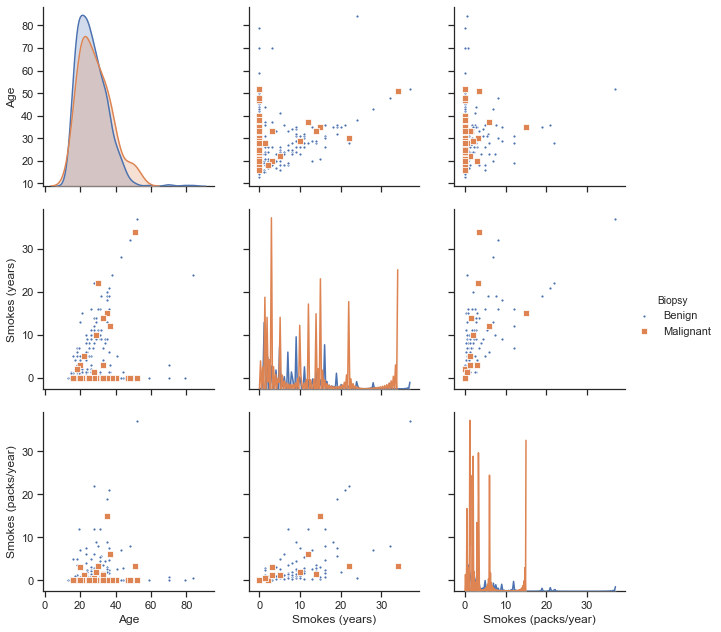

In [26]:
sns.pairplot(df_smoking, hue='Biopsy', markers=['.','s'], height=3, aspect=1, kind='scatter') #, diag_kind='kde')
plt.show()

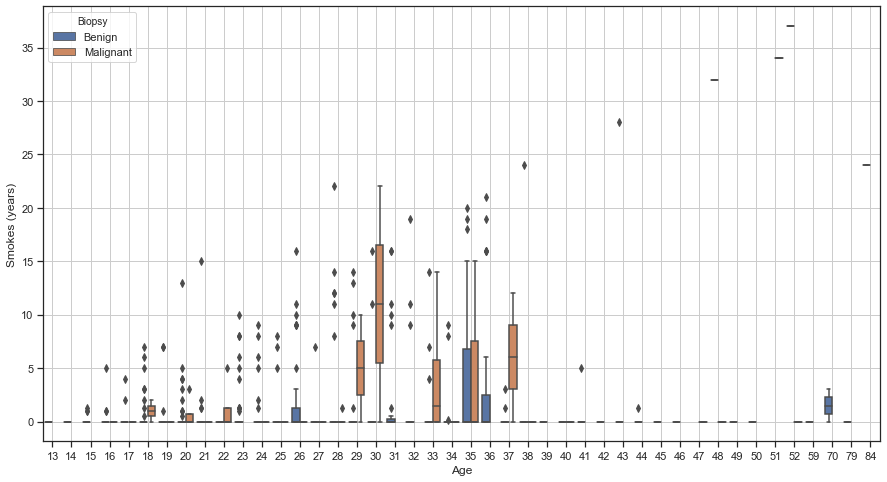

In [27]:
fig, ax_1 = plt.subplots(figsize=(15,8))
sns.boxplot(x="Age", y="Smokes (years)", hue="Biopsy", data=df_smoking, orient="v", ax=ax_1)
plt.grid(True)
plt.show()

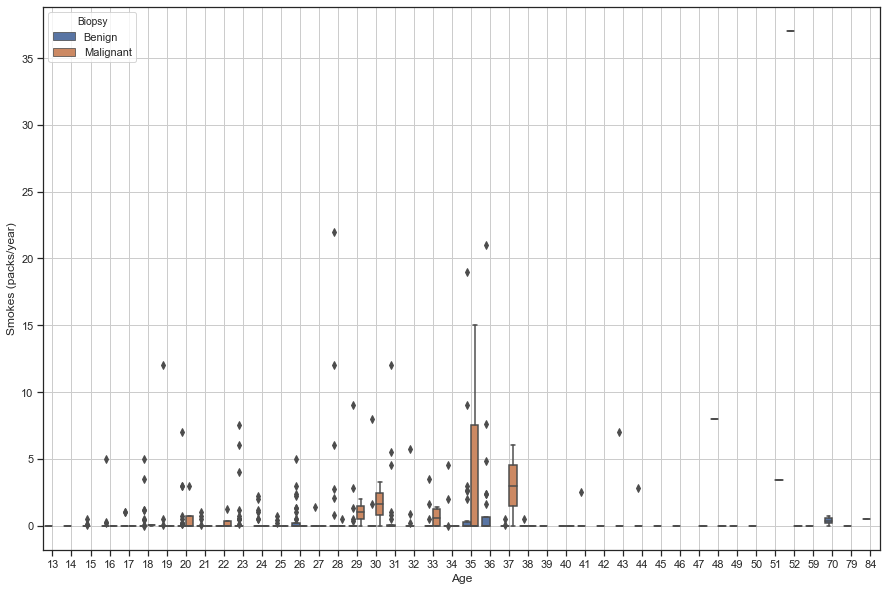

In [28]:
fig, ax_1 = plt.subplots(figsize=(15,10))
sns.boxplot(x="Age", y="Smokes (packs/year)", hue="Biopsy", data=df_smoking, orient="v", ax=ax_1)
plt.grid(True)
plt.show()

In [29]:
df_hormone_IUD = df_data_v1[['Age', 'Hormonal Contraceptives (years)', 'IUD (years)', 'Biopsy']]

In [30]:
df_hormone_IUD.head(3)

,Age,Hormonal Contraceptives (years),IUD (years),Biopsy
0,18,0.0,0.0,0
1,15,0.0,0.0,0
2,34,0.0,0.0,0


In [31]:
df_hormone_IUD['Biopsy'] = df_hormone_IUD['Biopsy'].map({0:'Benign', 1:'Malignant'})

C:\Users\elias\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [32]:
df_hormone_IUD.head(3)

,Age,Hormonal Contraceptives (years),IUD (years),Biopsy
0,18,0.0,0.0,Benign
1,15,0.0,0.0,Benign
2,34,0.0,0.0,Benign


C:\Users\elias\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\elias\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\elias\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


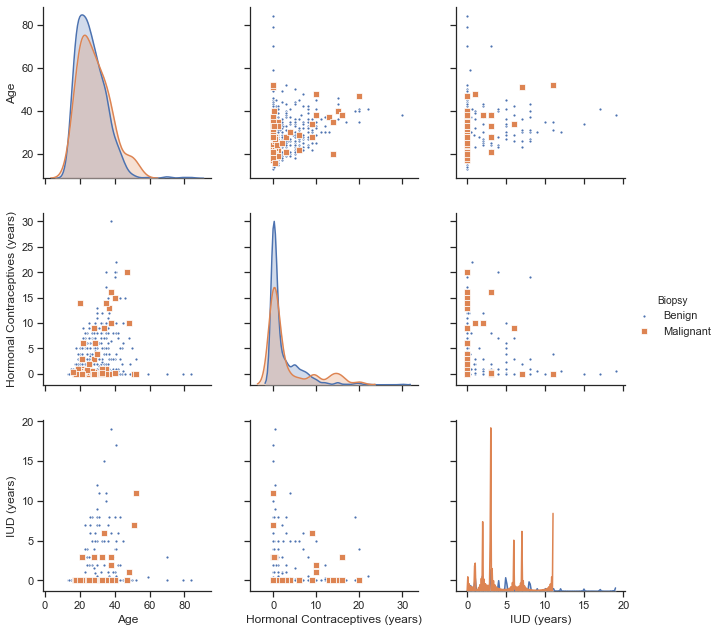

In [33]:
_ = sns.pairplot(df_hormone_IUD, hue='Biopsy', markers=['.','s'], height = 3, aspect=1, kind='scatter', diag_kind='kde')
_ = plt.show()

In [34]:
# df_data_v1["Biopsy"] = df_data_v1["Biopsy"].map({0:"Benign", 1:"Malignant"})

## Droping outliers 

In [35]:
# df_data_v2 = df_data_v1[df_data_v1.Age >=18] 
# df_data_v2 = df_data_v2[df_data_v2.Age <= 40]

# df_data_v1.isnull().sum()

df_data_v2 = df_data_v1[(df_data_v1.Age >= 18) & (df_data_v1.Age <= 40)]

In [36]:
df_data_v2.shape

(720, 34)

In [37]:
df_data_v2["Biopsy"] = df_data_v2["Biopsy"].map({0:"Benign", 1:"Malignant"})

C:\Users\elias\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [38]:
df_data_v3 = df_data_v2.fillna(method='ffill', inplace=True) # fillna geneartes a new object
# df_data_v2.isnull().sum()

C:\Users\elias\Anaconda3\lib\site-packages\pandas\core\frame.py:3790: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [39]:
type(df_data_v3)

NoneType

In [40]:
df_data_v2.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,Benign
2,34,1.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,Benign
7,26,1.0,26.0,3.0,0.0,0.0,0.0,1.0,2.0,1.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,Benign
11,27,1.0,17.0,3.0,0.0,0.0,0.0,1.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,Benign
15,40,3.0,18.0,2.0,0.0,0.0,0.0,1.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,Benign


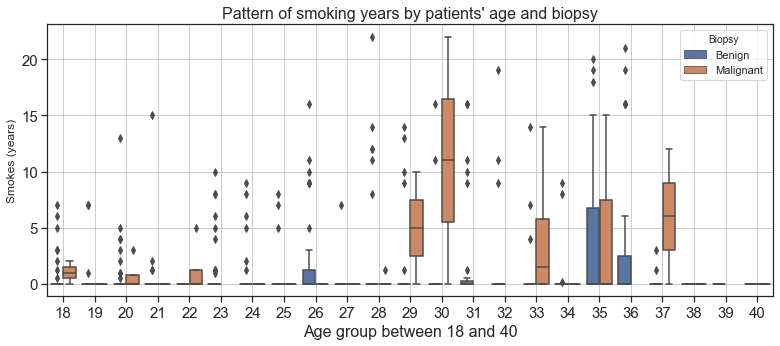

In [41]:
fig, ax1 = plt.subplots(figsize=(13,5))
sns.boxplot(x="Age", y="Smokes (years)", hue="Biopsy", data = df_data_v2, ax = ax1)
ax1.tick_params(labelsize=15)
ax1.set_xlabel("Age group between 18 and 40", fontsize=16)
ax1.set_title("Pattern of smoking years by patients' age and biopsy", fontsize=16)
ax1.grid(True)

In [42]:
df_smoking_v1 = df_data_v2[["Age", "Smokes (years)", "Smokes (packs/year)", "Biopsy"]]

C:\Users\elias\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


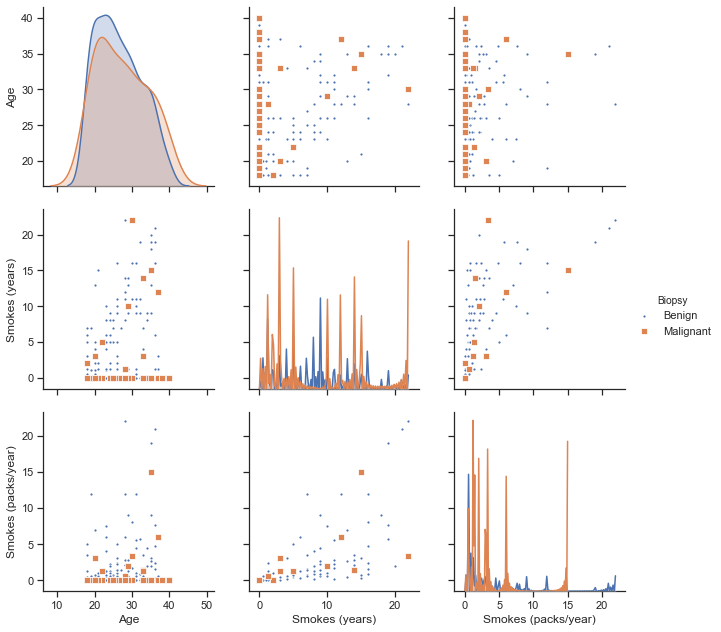

In [43]:
sns.pairplot(df_smoking_v1, hue="Biopsy", markers=['.', 's'], height = 3, kind = 'scatter')
plt.show()

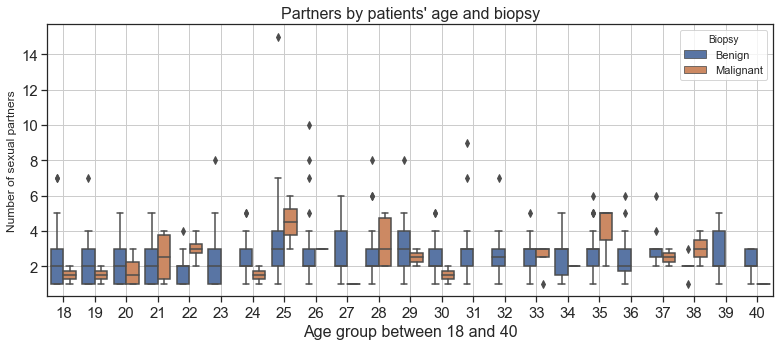

In [44]:
fig, ax1 = plt.subplots(figsize=(13,5))
sns.boxplot(x="Age", y="Number of sexual partners", hue="Biopsy", data = df_data_v2, ax = ax1)
ax1.tick_params(labelsize=15)
ax1.set_xlabel("Age group between 18 and 40", fontsize=16)
ax1.set_title("Partners by patients' age and biopsy", fontsize=16)
ax1.grid(True)

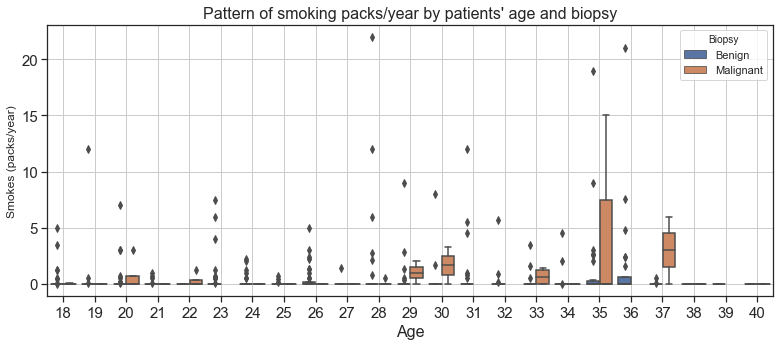

In [45]:
fig, ax1 = plt.subplots(figsize=(13,5))
sns.boxplot(x="Age", y="Smokes (packs/year)", hue="Biopsy", data = df_data_v2, ax = ax1)
ax1.tick_params(labelsize=15)
ax1.set_xlabel("Age", fontsize=16)
ax1.set_title("Pattern of smoking packs/year by patients' age and biopsy", fontsize=16)
ax1.grid(True)

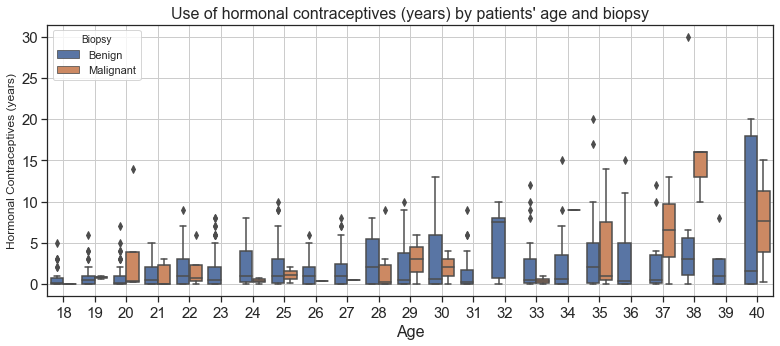

In [46]:
fig, ax1 = plt.subplots(figsize=(13,5))
sns.boxplot(x="Age", y="Hormonal Contraceptives (years)", hue="Biopsy", data = df_data_v2, ax = ax1)
ax1.tick_params(labelsize=15)
ax1.set_xlabel("Age", fontsize=16)
ax1.set_title("Use of hormonal contraceptives (years) by patients' age and biopsy", fontsize=16)
ax1.grid(True)

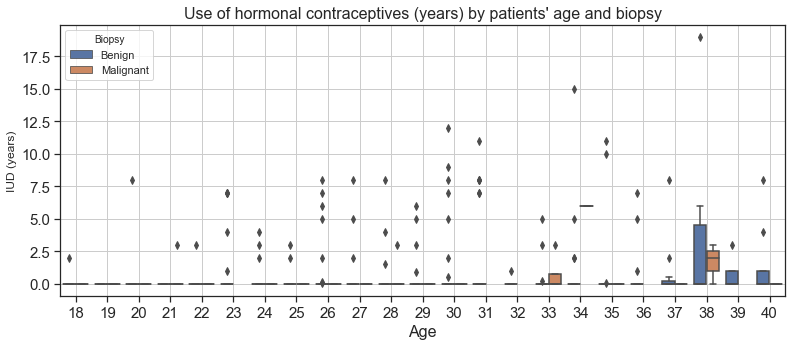

In [47]:
fig, ax1 = plt.subplots(figsize=(13,5))
sns.boxplot(x="Age", y="IUD (years)", hue="Biopsy", data = df_data_v2, ax = ax1)
ax1.tick_params(labelsize=15)
ax1.set_xlabel("Age", fontsize=16)
ax1.set_title("Use of hormonal contraceptives (years) by patients' age and biopsy", fontsize=16)
ax1.grid(True)

## Statistical Inference: Hypothesis testing 

Let $\mu_m$ be the mean smoking years by **malignant** pateients 
and $\mu_b$ be the mean smoking years by **benign** patients

$H_0$: $\mu_m - \mu_b = 0$   

$H_1$: $\mu_m - \mu_b \neq 0$

$\alpha = 0.01$, We would like to test the null hypothesis with the significance level of $\alpha = 0.01$

In [48]:
# df_smoking_v1 
# print(df_smoking_v1.isnull().sum())
# df_smoking_v1.fillna(method='ffill', axis=1)
# print(df_smoking_v1.isnull().sum())

mean_smoke_years_malignant = np.mean(df_smoking_v1[df_smoking_v1['Biopsy']=='Malignant']['Smokes (years)'])
mean_smoke_years_benign = np.mean(df_smoking_v1[df_smoking_v1['Biopsy']=='Benign']['Smokes (years)'])

print("Mean smoking years by malignant patients: {:.2f}".format(mean_smoke_years_malignant))
print("Mean smoking years by benign patients:    {:.2f}".format(mean_smoke_years_benign))

Mean smoking years by malignant patients: 1.78
Mean smoking years by benign patients:    1.17


In [49]:
smoking_years_malignant = df_smoking_v1[df_smoking_v1['Biopsy']=='Malignant']['Smokes (years)']
smoking_years_benign = df_smoking_v1[df_smoking_v1['Biopsy']=='Benign']['Smokes (years)']

mean_smoke = np.mean(np.concatenate((smoking_years_malignant, smoking_years_benign)))

shifted_mean_malignant = smoking_years_malignant - np.mean(smoking_years_malignant) + mean_smoke
shifted_mean_benign    = smoking_years_benign - np.mean(smoking_years_benign) + mean_smoke


# print(mean_smoke)

def mean_diff(data_malignant, data_benign):
    mean_malignant = np.mean(data_malignant)
    mean_benign    = np.mean(data_benign)
    return mean_malignant - mean_benign

sample_mean_diff = mean_diff(smoking_years_malignant, smoking_years_benign)
print("Sample mean diff: {:.2f}".format(sample_mean_diff))

Sample mean diff: 0.62


In [50]:
def draw_replicates(data, size=1):
    bs_rep_sample = np.zeros(size)
    for i in range(size):
        bs_rep_sample[i] = np.mean(np.random.choice(data, size=len(data)))
    return bs_rep_sample        

In [51]:
np.random.seed(42)
smoking_rep_malignant = draw_replicates(shifted_mean_malignant, size=10000)
smoking_rep_benign = draw_replicates(shifted_mean_benign, size=10000)
# len(smoking_rep_malignant)
mean_rep = smoking_rep_malignant - smoking_rep_benign
print()

C:\Users\elias\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


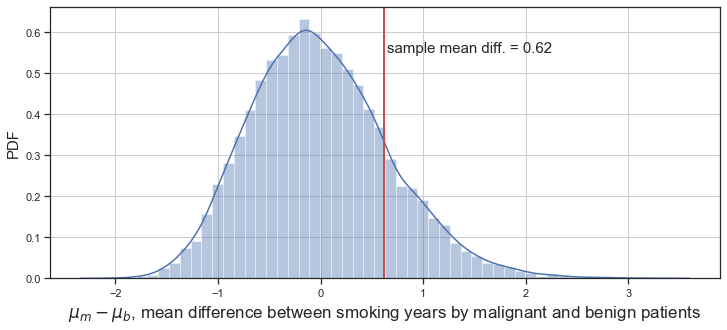

In [52]:
f, ax = plt.subplots(figsize=(12,5))
_ = sns.distplot(mean_rep, bins=50, ax = ax)
_ = plt.axvline(sample_mean_diff, color='r', linestyle='-', linewidth=2)
_= plt.text(0.65, 0.55, s='sample mean diff. = 0.62', fontsize=15)
_ = plt.xlabel('$\mu_m-\mu_b$, mean difference between smoking years by malignant and benign patients', fontsize=17)
_ = plt.ylabel('PDF', fontsize=15)
_ = plt.grid(True)

In [53]:
confidence_interval_95 = np.percentile(mean_rep, [2.5, 97.5])
print("95% confidence interval of mean difference between smoking years by malignant and benign patients:\n ", confidence_interval_95)

95% confidence interval of mean difference between smoking years by malignant and benign patients:
  [-1.17023803  1.43799103]


In [54]:
p_value = np.sum(mean_rep >= sample_mean_diff)/len(mean_rep)
print("p_value: ", p_value)

p_value:  0.1697


### p_value = 0.1697. That is, at least 17% of times, the simulated mean difference in smoking years by malignant and benign patients are greater than 0.62, assuming that the null hypothesis is true. 

### Since p-value is greater that $\alpha=0.1$, we can not reject the null hypothesis. That is, There is not enough evidence that mean smoking years of malignant and benign patients are significanlty different.

## Classification using Scikit learn Logistic Regression

We will apply logistic regression to classfy malignant and benign patients by their age and smoking habits (smoking years and number of packs)

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_curve, roc_auc_score, classification_report
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.preprocessing import scale
from inspect import signature

In [56]:
import warnings
warnings.filterwarnings('ignore')

In [57]:
df_data_lg = df_data_v1.fillna(method='ffill')

In [58]:
penalties = ['l1', 'l2']
Cs = np.logspace(-3, 1, 20)
hyper_params = dict(C = Cs, penalty = penalties)

In [59]:
def logistic_model(X, y, testsize = 0.2, randomstate = 42, hyper_parameters = hyper_params):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= testsize, random_state = randomstate)
    log_reg = LogisticRegression(class_weight='balanced')
    
    
    # Develop GridSearchCV
    gs_cv = GridSearchCV(estimator=log_reg, param_grid = hyper_parameters, cv=5)

    # Conduct Grid Search
    best_model = gs_cv.fit(X_train, y_train)
    
    print("Best penalty (from training data):     ", best_model.best_estimator_.get_params()['penalty'])
    print("Best C (from training data):     {:.4f}".format(best_model.best_estimator_.get_params()['C']))
    print("Best score (from training data): {:.4f} ".format(best_model.best_score_))

    
    y_pred = gs_cv.predict(X_test)
    y_pred_prob = gs_cv.predict_proba(X_test)[:,1]

    fpr, tpr, thresolds = roc_curve(y_test, y_pred_prob)
    roc_score = roc_auc_score(y_test, y_pred_prob)
    print()
    print("\n======================")
    print("Classification Report")
    print("======================")
    print()
    print(classification_report(y_test, y_pred))
    print()
    # plot ROC Curve
    print("ROC SCORE: {:.4f}".format(roc_score))
    sns.set()
    plt.figure(figsize=(12,6))
    plt.plot([0,1],[0,1], 'k--')
    plt.plot(fpr, tpr, label="Logistic Regression")
    plt.xlabel("False positive rate", fontsize=15)
    plt.ylabel("True positive rate", fontsize=15)
    plt.title("Logistic Regression ROC Curve with roc score: {0:0.2f}".format(roc_score), fontsize=15)    
    
    print("=============================")
    print("Precision-recall curve")
    print("=============================")
    print()
    average_precision = average_precision_score(y_test, y_pred)
    print('Average precision-recall score: {0:0.2f}'.format(average_precision))
    print()
    
    precision, recall, _ = precision_recall_curve(y_test, y_pred)
    plt.figure(figsize=(12,6))
#     step_kwargs = ({'step': 'post'}
#                if 'step' in signature(plt.fill_between).parameters
#                else {})
    plt.plot(recall, precision, label="Precision recall curve")
#     plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

    plt.xlabel('Recall', fontsize=15)
    plt.ylabel('Precision', fontsize=15)
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision), fontsize=15)

### Applying logisitic regression to the whole dataset without dropping outliers

Best penalty (from training data):      l1
Best C (from training data):     0.0183
Best score (from training data): 0.9636 


Classification Report

              precision    recall  f1-score   support

           0       0.99      0.96      0.97       161
           1       0.59      0.91      0.71        11

   micro avg       0.95      0.95      0.95       172
   macro avg       0.79      0.93      0.84       172
weighted avg       0.97      0.95      0.96       172


ROC SCORE: 0.9735
Precision-recall curve

Average precision-recall score: 0.54



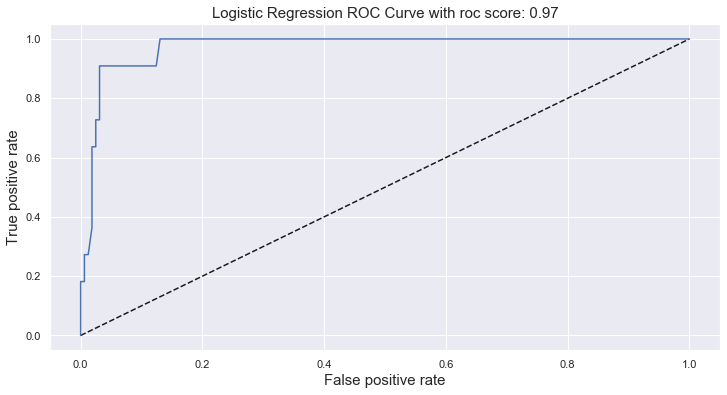

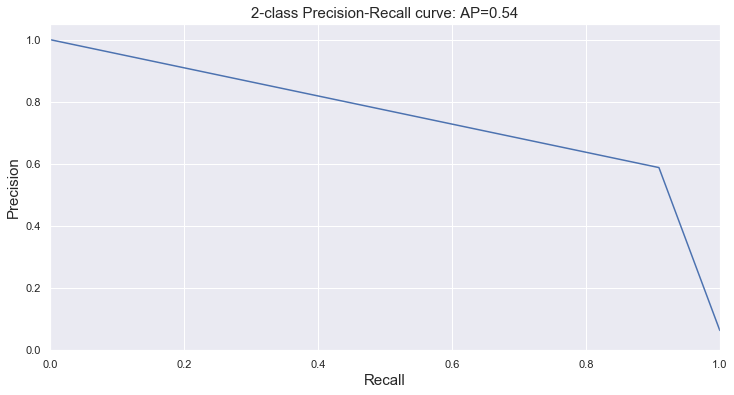

In [60]:
X = df_data_lg.drop(['Biopsy'], axis=1).values
y = df_data_lg[["Biopsy"]].values

logistic_model(X, y)

## Applying logisitic regression after dropping outliers
***

In [61]:
# drop outliers: patients age below 18 years and above 40 years

df_data_lg_age_18_40 = df_data_lg[(df_data_lg.Age >= 18) & (df_data_lg.Age <=40)]

Best penalty (from training data):      l1
Best C (from training data):     0.0183
Best score (from training data): 0.9618 


Classification Report

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       134
           1       0.83      1.00      0.91        10

   micro avg       0.99      0.99      0.99       144
   macro avg       0.92      0.99      0.95       144
weighted avg       0.99      0.99      0.99       144


ROC SCORE: 0.9918
Precision-recall curve

Average precision-recall score: 0.83



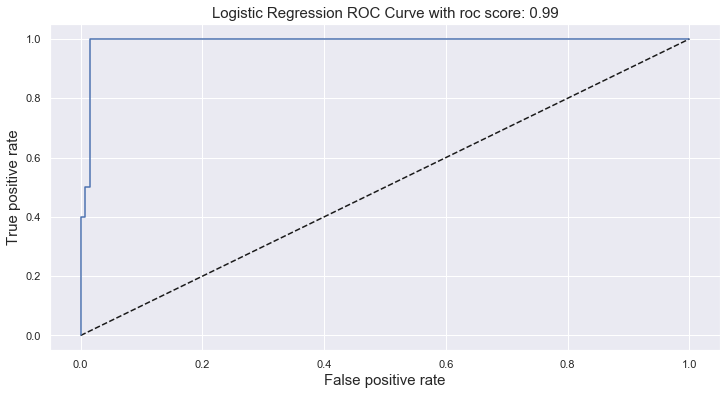

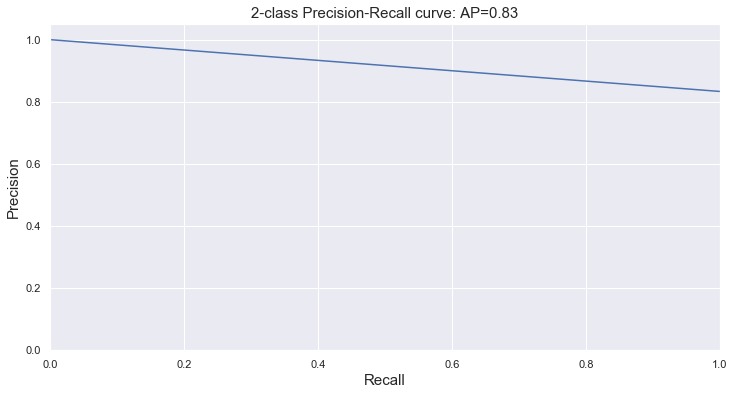

In [62]:
X_no_outliers = df_data_lg_age_18_40.drop(['Biopsy'], axis=1).values
y_no_outliers  = df_data_lg_age_18_40[["Biopsy"]].values

# Apply logistic regression
logistic_model(X_no_outliers, y_no_outliers)

## Conclusion: Removing outliers from the dataset offers better logistic regression classification.
***

|Logisitic regression score   | Before removing outliers| After removing outliers|
|---|---|---|
|ROC score | 0.97 | 0.99 |
|Average precision-recall score|0.54 | 0.83|

## Classification using Support Vector Machine (SVM)
***

In [63]:
from sklearn.svm import SVC

In [64]:
tuned_parameter = {'gamma':[1e-3, 1e-4], 'C':[1, 10, 100, 1000]}
# gamma_values = [1, 2, 3, 4, 5]
# C_values = np.logspace(-3, 1, 10)

In [65]:
clf_svc = SVC(class_weight='balanced', random_state=42)
clf_grd_search_with_svc = GridSearchCV(estimator=clf_svc, param_grid = tuned_parameter, cv=5)

In [67]:
clf_svc

SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=42,
  shrinking=True, tol=0.001, verbose=False)

In [69]:
X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(X_no_outliers,y_no_outliers,test_size=0.3,random_state=42)

In [70]:
svm_best_model = clf_grd_search_with_svc.fit(X_train_svm, y_train_svm)

In [71]:
print("SVM best parameters: ", svm_best_model.best_params_)
print()
means = svm_best_model.cv_results_['mean_test_score']
stds = svm_best_model.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, svm_best_model.cv_results_['params']):
    print("Mean (std. dev.):  %0.4f (+/-%0.04f), for %r"
              % (mean, std * 2, params))
print("Best Score: %0.4f " % svm_best_model.best_score_)
print()

print("Detailed classification report:")
print()
# print("The model is trained on the full development set.")
# print("The scores are computed on the full evaluation set.")
print()
y_true, y_pred_svm = y_test_svm, svm_best_model.predict(X_test_svm)
print(classification_report(y_true, y_pred_svm))

SVM best parameters:  {'C': 100, 'gamma': 0.0001}

Mean (std. dev.):  0.8095 (+/-0.1425), for {'C': 1, 'gamma': 0.001}
Mean (std. dev.):  0.2877 (+/-0.4649), for {'C': 1, 'gamma': 0.0001}
Mean (std. dev.):  0.9444 (+/-0.0203), for {'C': 10, 'gamma': 0.001}
Mean (std. dev.):  0.8016 (+/-0.1271), for {'C': 10, 'gamma': 0.0001}
Mean (std. dev.):  0.9286 (+/-0.0236), for {'C': 100, 'gamma': 0.001}
Mean (std. dev.):  0.9504 (+/-0.0330), for {'C': 100, 'gamma': 0.0001}
Mean (std. dev.):  0.9167 (+/-0.0615), for {'C': 1000, 'gamma': 0.001}
Mean (std. dev.):  0.9306 (+/-0.0249), for {'C': 1000, 'gamma': 0.0001}
Best Score: 0.9504 

Detailed classification report:


              precision    recall  f1-score   support

           0       1.00      0.99      0.99       197
           1       0.90      1.00      0.95        19

   micro avg       0.99      0.99      0.99       216
   macro avg       0.95      0.99      0.97       216
weighted avg       0.99      0.99      0.99       216



Average precision-recall score: 0.90



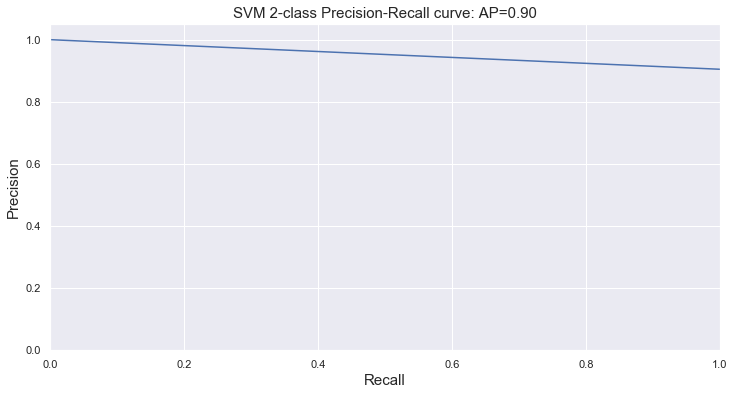

In [72]:
average_precision_svm = average_precision_score(y_test_svm, y_pred_svm)
print('Average precision-recall score: {0:0.2f}'.format(average_precision_svm))
print()
    
precision_svm, recall_svm, _ = precision_recall_curve(y_test_svm, y_pred_svm)
plt.figure(figsize=(12,6))
#     step_kwargs = ({'step': 'post'}
#                if 'step' in signature(plt.fill_between).parameters
#                else {})
plt.plot(recall_svm, precision_svm, label="Precision Recall Curve")
#     plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall', fontsize=15)
plt.ylabel('Precision', fontsize=15)
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('SVM 2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision_svm), fontsize=15)
plt.show()

## Interpretation: SVM has better Average Precision-Recall Score than Logistic regression
***

Since the dataset contains an imbalance class with less positive instances, we compare precision-recall scores:

|Score | SVM | Logistic regression|
|---|---|---|
|Precision-recall score| 0.90 |0.83|

## Conclusions:
****

* This project presents data exploration, statistical inference, and classification  of risk factors for cervical cancer diagnosis.
* The dataset contains 36 attributes or features for 858 patients. The dataset has class imbalance as there are only 55 malignant patients (biopsy = 1) out of 858 patients. 
* Exploratory analysis shows that patients between ages of 18 and 40 are more vulnerable to cervical cancer.
* Statistical hypothesis test shows that there is not enough evidence that the mean smoking year of malignant patients is significantly different than the mean smoking year of benign patients.  
* Application of machine learning classification algorithm shows that support vector machine (SVM) performs better than logistic regression in term of precision-recall score.